To generate a forecast for the next 12 months based on your present sales data, you can follow these steps:

1. Data Preparation: Organize and preprocess your sales data to ensure it is in a suitable format for forecasting. This may involve removing any outliers or missing values, converting the data into a consistent time series format, and aggregating the data to the desired time granularity (e.g., monthly).

2. Visualize the Data: Plot your sales data over the last five years to observe any underlying trends or patterns. This will help you gain insights into the overall behavior of the data and identify any non-seasonal trends.

3. Trend Analysis: Analyze the trend in your sales data to understand its direction and magnitude. You can use techniques such as simple moving averages, exponential smoothing, or linear regression to estimate and visualize the trend component.

4. Seasonality Analysis: If there are seasonal patterns in your data, decompose the time series into its seasonal, trend, and residual components using methods like seasonal decomposition of time series (e.g., STL decomposition) or moving averages. This will help isolate the non-seasonal trend.

5. Forecasting Model Selection: Based on the characteristics of your data and the insights gained from the trend and seasonality analysis, choose an appropriate forecasting model. Common models for non-seasonal data include simple exponential smoothing, autoregressive integrated moving average (ARIMA), or trend models like Holt's linear or exponential smoothing.

6. Model Fitting: Fit the selected forecasting model to your sales data. Use the historical data to estimate the model parameters and validate the model's performance against a validation dataset, if available.

7. Forecasting: Once the model is fitted and validated, use it to generate forecasts for the next 12 months. Provide the necessary inputs to the model, such as the trend component or any other relevant variables. The output will be the forecasted sales values for the next 12 months.

8. Evaluate and Refine: Assess the accuracy of your forecasts by comparing them with the actual sales values once they become available. If necessary, refine the model or explore other forecasting techniques to improve the accuracy of future predictions.

Remember that the choice of forecasting model and techniques may depend on the specific characteristics of your data and the underlying business context. It's also important to consider external factors, such as market trends or upcoming events, that may influence sales and adjust your forecasts accordingly.

In [296]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [297]:
os.chdir("C:\\Users\\Shingan\\Downloads")
df=pd.read_csv("modified_dataset.csv")

1.Data Preparation: 

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18065 entries, 0 to 18064
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction ID     18065 non-null  int64  
 1   Date               18065 non-null  object 
 2   Transaction Price  18065 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 423.5+ KB


In [299]:
df['datetime_column'] = pd.to_datetime(df['Date'])

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18065 entries, 0 to 18064
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     18065 non-null  int64         
 1   Date               18065 non-null  object        
 2   Transaction Price  18065 non-null  float64       
 3   datetime_column    18065 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 564.7+ KB


In [301]:
df = df.drop('Date', axis=1)

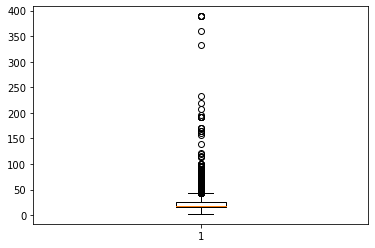

In [302]:
plt.boxplot(df['Transaction Price'])
plt.show()




In [303]:
df[df['Transaction Price']> 100].count()


Transaction ID       34
Transaction Price    34
datetime_column      34
dtype: int64

In [304]:
df['Transaction Price'].describe()

count    18065.000000
mean        22.497525
std         14.458237
min          2.510000
25%         15.280000
50%         18.320000
75%         26.240000
max        389.010000
Name: Transaction Price, dtype: float64

2.Visualize the Data:


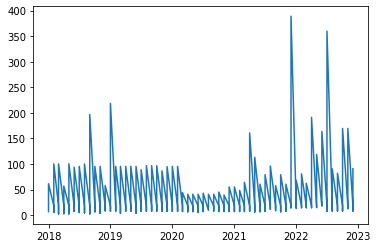

In [305]:
plt.plot(df['datetime_column'],df['Transaction Price'])
plt.show()

In [306]:
#Clean from the columns

df = df[df['Transaction Price']< 100]

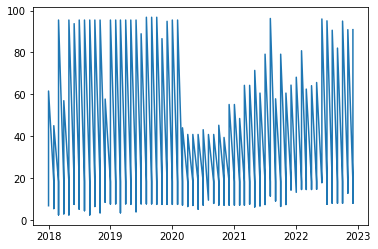

In [307]:

plt.plot(df['datetime_column'],df['Transaction Price'])
plt.show()

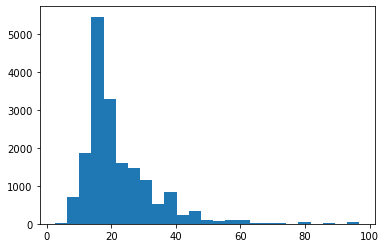

In [308]:
plt.hist(df['Transaction Price'],25,)
plt.show()

In [309]:
#Descripative Analysis
#Univariate
#Bivariate
#multivariate

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18030 entries, 0 to 18064
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     18030 non-null  int64         
 1   Transaction Price  18030 non-null  float64       
 2   datetime_column    18030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 563.4 KB


In [311]:
#Univarite

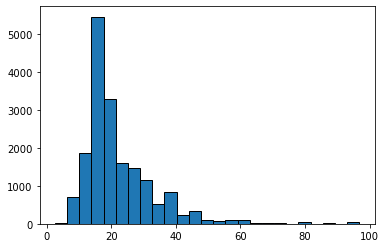

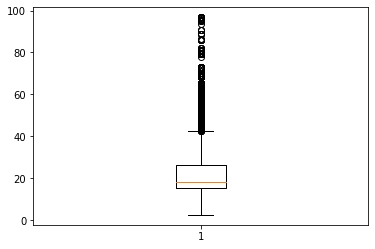

In [312]:
plt.hist(df['Transaction Price'], bins=25, edgecolor='black')
plt.show()
plt.boxplot(df['Transaction Price'])
plt.show()

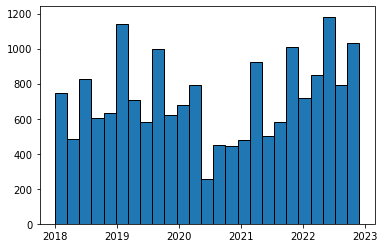

In [313]:
plt.hist(df['datetime_column'], bins=25, edgecolor='black')
plt.show()


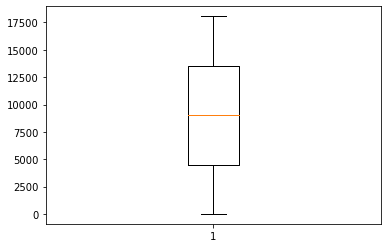

In [314]:
plt.boxplot(df['Transaction ID'])
plt.show()

In [315]:
#Bivariate Analysis

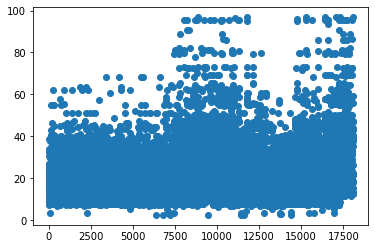

In [316]:
plt.scatter( df['Transaction ID'],df['Transaction Price'])
plt.show()

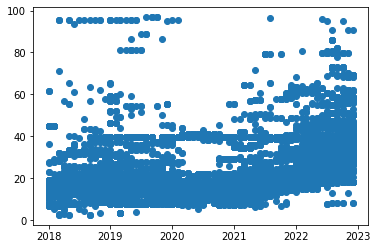

In [317]:
plt.scatter(df['datetime_column'],df['Transaction Price'])
plt.show()

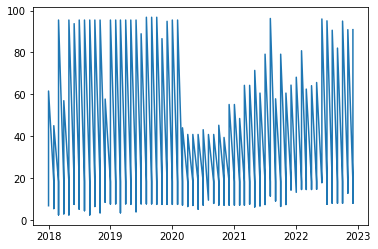

In [318]:
plt.plot(df['datetime_column'], df['Transaction Price'])
plt.show()

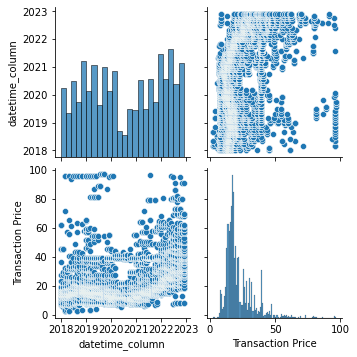

In [319]:
sns.pairplot(df, vars=['datetime_column', 'Transaction Price'])
plt.show()

In [320]:
#multiVariate Analysis

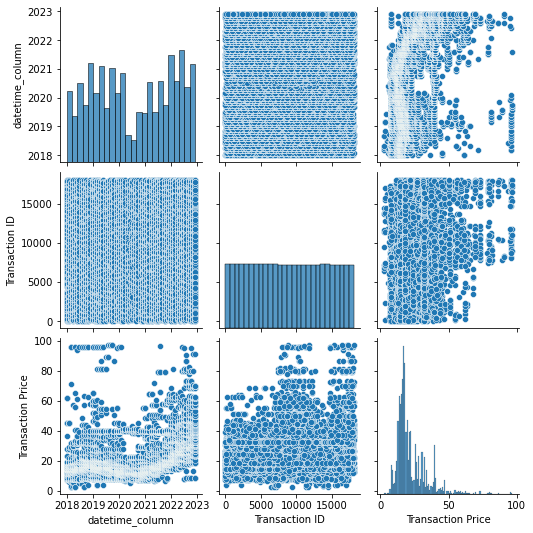

In [321]:
sns.pairplot(df, vars=['datetime_column', 'Transaction ID', 'Transaction Price'])
plt.show()

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18030 entries, 0 to 18064
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     18030 non-null  int64         
 1   Transaction Price  18030 non-null  float64       
 2   datetime_column    18030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 563.4 KB


In [323]:
df.head()

,Transaction ID,Transaction Price,datetime_column
0,7525,6.89,2018-01-01
1,8837,6.89,2018-01-01
2,11999,6.89,2018-01-01
3,7985,6.89,2018-01-01
4,10967,6.89,2018-01-01


3.TREND ANALYSIS

In [324]:
import pandas as pd

df['month'] = pd.DatetimeIndex(df['datetime_column']).month
df['year'] = pd.DatetimeIndex(df['datetime_column']).year

df = df.groupby(by=["year", "month"], as_index=False).sum()

#print(df)


In [325]:
df['year_month']=df['year'].astype(str)+'-'+df['month'].astype(str).str.zfill(2)

In [326]:
df['datetime_column'] = pd.to_datetime(df['year_month'])


In [329]:
df.info()
# Remove the last month from the data
df = df.iloc[:-1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               59 non-null     int64         
 1   month              59 non-null     int64         
 2   Transaction ID     59 non-null     int64         
 3   Transaction Price  59 non-null     float64       
 4   year_month         59 non-null     object        
 5   datetime_column    59 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.2+ KB


In [330]:
data= df[['datetime_column','Transaction Price']]

In [331]:
data.head()

,datetime_column,Transaction Price
0,2018-01-01,3525.64
1,2018-02-01,4140.13
2,2018-03-01,4607.57
3,2018-04-01,3677.93
4,2018-05-01,4455.88


Simple Moving Average

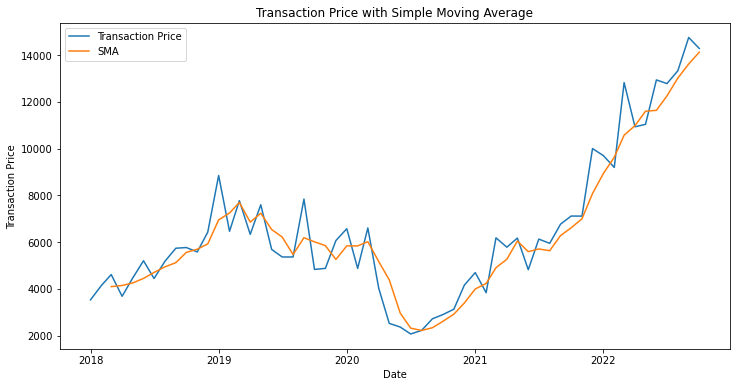

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
df.set_index('datetime_column', inplace=True)

# Calculate the 3-month simple moving average
window_size = 3
df['SMA'] = df['Transaction Price'].rolling(window=window_size).mean()

# Reset the index
df.reset_index(inplace=True)

# Plot the original data and the simple moving average
plt.figure(figsize=(12, 6))
plt.plot(df['datetime_column'], df['Transaction Price'], label='Transaction Price')
plt.plot(df['datetime_column'], df['SMA'], label='SMA')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('Transaction Price with Simple Moving Average')
plt.legend()
plt.show()


In [333]:
Expoential Smooting 

SyntaxError: invalid syntax (<ipython-input-333-0e82c1b9837d>, line 1)

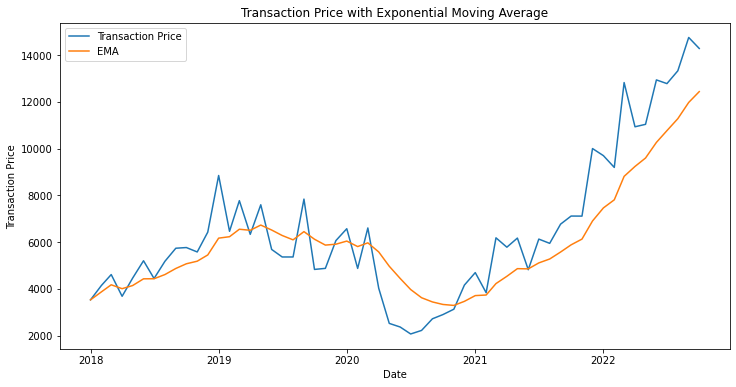

In [334]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
df.set_index('datetime_column', inplace=True)

# Calculate the exponential moving average
alpha = 0.2
df['EMA'] = df['Transaction Price'].ewm(alpha=alpha).mean()

# Reset the index
df.reset_index(inplace=True)

# Plot the original data and the exponential moving average
plt.figure(figsize=(12, 6))
plt.plot(df['datetime_column'], df['Transaction Price'], label='Transaction Price')
plt.plot(df['datetime_column'], df['EMA'], label='EMA')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('Transaction Price with Exponential Moving Average')
plt.legend()
plt.show()


Liner Regression

                            OLS Regression Results                            
Dep. Variable:      Transaction Price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     15.26
Date:                Sun, 21 May 2023   Prob (F-statistic):           5.35e-06
Time:                        19:53:16   Log-Likelihood:                -536.12
No. Observations:                  58   AIC:                             1078.
Df Residuals:                      55   BIC:                             1084.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.713e+06   4.92e+05     -5.511      0.0

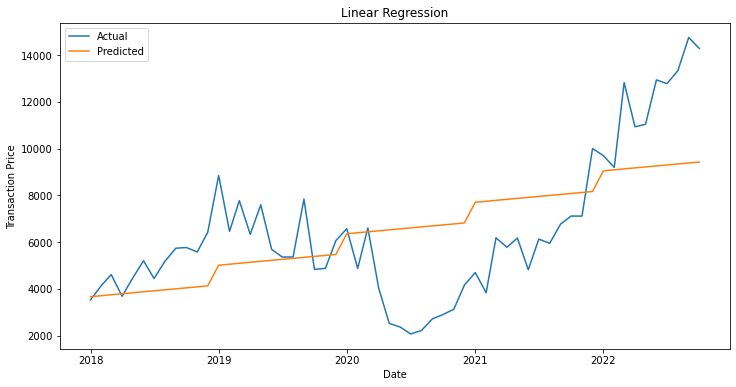

In [335]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns

# Create the feature matrix X and the target variable y
X = df[['year', 'month']]
y = df['Transaction Price']

# Add a constant column to X for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

# Plot the actual data and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['datetime_column'], y, label='Actual')
plt.plot(df['datetime_column'], results.predict(X), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('Linear Regression')
plt.legend()
plt.show()


4.Seasonality Analysis:

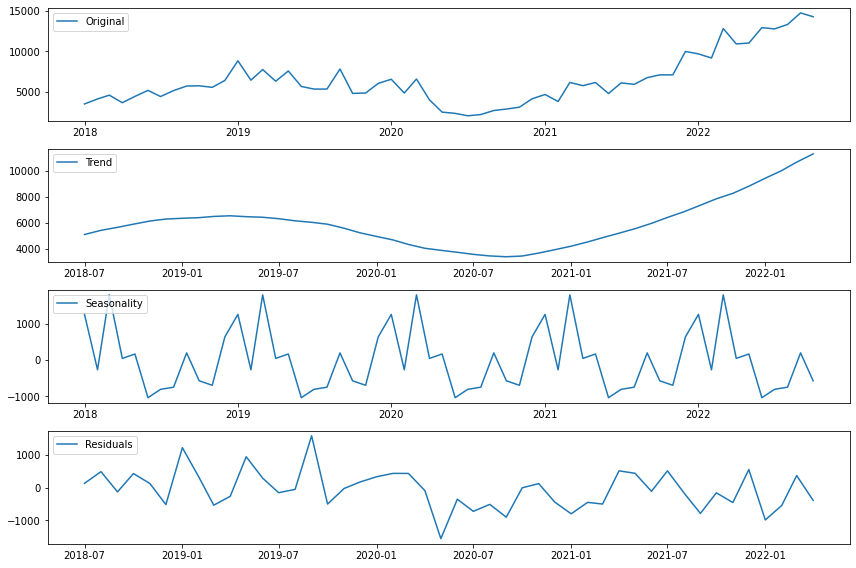

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
df.set_index('datetime_column', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df['Transaction Price'], model='additive', period=12)

# Plot the original data, trend, seasonality, and residuals
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Transaction Price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


5.Forecasting Model Selection: 

1.SARIMA

 SARIMA models are an extension of the ARIMA model that incorporates seasonality. They are capable of capturing both the trend and seasonal patterns in the data. SARIMA models are widely used for time series forecasting when the data display both trend and seasonality.

6. Model Fitting 

In [ ]:
!pip install pmdarima

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime_column    60 non-null     datetime64[ns]
 1   year               60 non-null     int64         
 2   month              60 non-null     int64         
 3   Transaction ID     60 non-null     int64         
 4   Transaction Price  60 non-null     float64       
 5   year_month         60 non-null     object        
 6   SMA                58 non-null     float64       
 7   EMA                60 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 3.9+ KB


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -509.926
Date:                Sun, 21 May 2023   AIC                           1023.853
Time:                        17:36:32   BIC                           1028.008
Sample:                             0   HQIC                          1025.474
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3333      0.147     -2.274      0.023      -0.621      -0.046
sigma2      1.878e+06   2.58e+05      7.269      0.000    1.37e+06    2.38e+06
Ljung-Box (L1) (Q):                   0.29   Jarque-

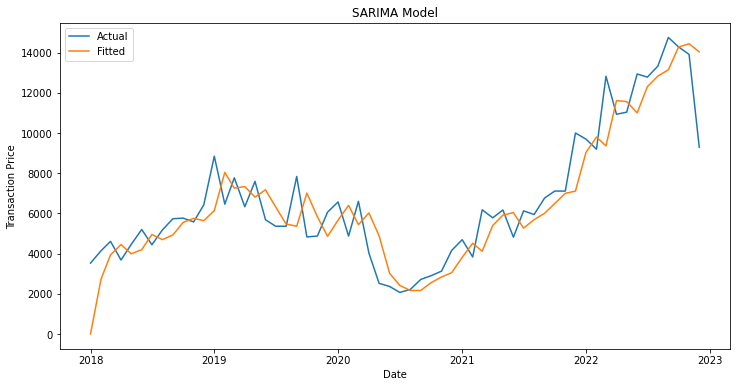

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Fit SARIMA model using auto_arima
model = auto_arima(df['Transaction Price'], seasonal=True, m=12)

# Print the model summary
print(model.summary())

# Plot the actual data and the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Transaction Price'], label='Actual')
plt.plot(df.index, model.predict_in_sample(), label='Fitted')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMA Model')
plt.legend()
plt.show()


Step 1: Import the required libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [237]:
# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)


# Create a time series from the 'Transaction Price' column
ts = df['Transaction Price']


In [238]:
# If you already have a predefined train and test split, you can skip this step

train_size = int(len(ts) * 0.8)  # 80% for training
train_data = ts[:train_size]
test_data = ts[train_size:]


In [239]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Create a time series from the 'Transaction Price' column
ts = df['Transaction Price']

# Define the range of values for each parameter
p_values = range(0, 3)  # Autoregressive order
d_values = range(0, 2)  # Differencing order
q_values = range(0, 3)  # Moving average order
P_values = range(0, 3)  # Seasonal autoregressive order
D_values = range(0, 2)  # Seasonal differencing order
Q_values = range(0, 3)  # Seasonal moving average order
S = 12  # Seasonal period (assuming monthly data)

best_aic = np.inf
best_order = None
best_seasonal_order = None

# Iterate over all possible combinations of parameter values
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        order = (p, d, q)
                        seasonal_order = (P, D, Q, S)

                        try:
                            # Fit the SARIMA model
                            model = sm.tsa.SARIMAX(ts, order=order, seasonal_order=seasonal_order)
                            result = model.fit()

                            # Check if the current model has a lower AIC value
                            if result.aic < best_aic:
                                best_aic = result.aic
                                best_order = order
                                best_seasonal_order = seasonal_order

                        except:
                            continue

print("Best SARIMA Order:", best_order)
print("Best Seasonal SARIMA Order:", best_seasonal_order)


Best SARIMA Order: (1, 1, 2)
Best Seasonal SARIMA Order: (0, 1, 1, 12)


In [240]:
# Define the SARIMA parameters
order = (0, 1, 0)  # Specify the order of the ARIMA component
seasonal_order = (0, 1, 1, 12)  # Specify the order of the seasonal component

# Fit the SARIMA model
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
result = model.fit()


Make predictions and evaluate the model

In [241]:
# Generate predictions for the test data
predictions = result.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate the root mean squared error (RMSE) and mean absolute error (MAE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 3660.675579693247
Mean Absolute Error (MAE): 3088.738971348915


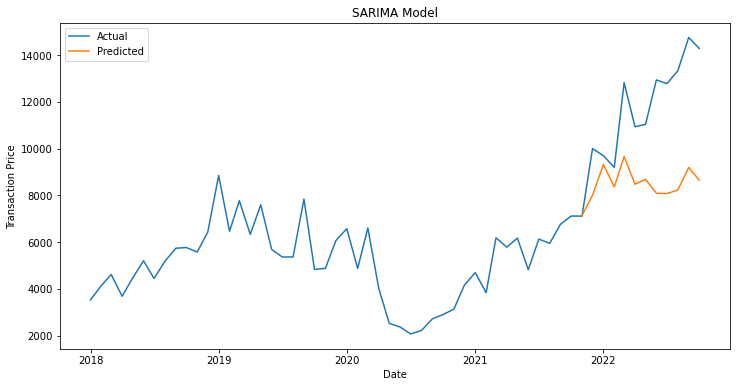

In [242]:
# Plot the actual data and the predictions
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMA Model')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE) for Test Data: 3985.9708925093655
Mean Absolute Error (MAE) for Test Data: 3550.888947387191


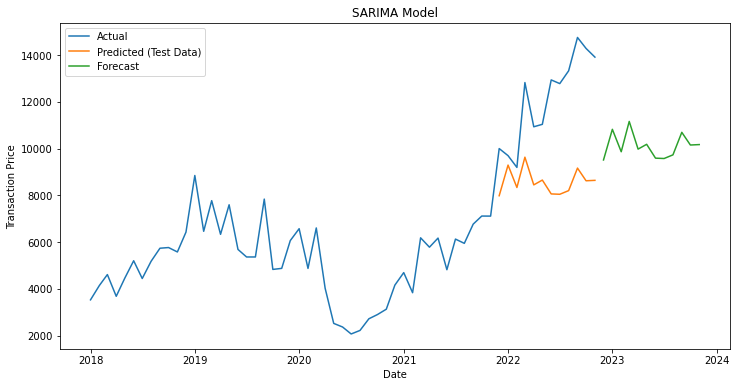

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)
# Remove the last month from the data

# Create a time series from the 'Transaction Price' column
ts = df['Transaction Price']

# Split the data into train and test sets
train_data = ts[:-12]  # Use all data except the last 12 months for training
test_data = ts[-12:]  # Use the last 12 months for testing

# Define the SARIMA parameters
order = (0, 1, 0)  # Specify the order of the ARIMA component
seasonal_order = (0, 1, 1, 12)  # Specify the order of the seasonal component

# Fit the SARIMA model
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Generate predictions for the next 12 months
start_date = test_data.index[-1] + pd.DateOffset(months=1)
end_date = start_date + pd.DateOffset(months=11)
forecast = result.predict(start=start_date, end=end_date)

# Calculate the root mean squared error (RMSE) and mean absolute error (MAE) for the test data
predictions = result.predict(start=test_data.index[0], end=test_data.index[-1])
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print("Root Mean Squared Error (RMSE) for Test Data:", rmse)
print("Mean Absolute Error (MAE) for Test Data:", mae)

# Plot the actual data, predictions for the test data, and forecast for the next 12 months
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual')
plt.plot(predictions, label='Predicted (Test Data)')
plt.plot(forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMA Model')
plt.legend()
plt.show()


In [232]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Define the SARIMA parameters
order = (0, 1, 0)  # (p, d, q)
seasonal_order = (0, 1, 1, 12)  # (P, D, Q, seasonal period)

# Split the data into train and test sets
train_data = df.iloc[:-12]['Transaction Price']
test_data = df.iloc[-12:]['Transaction Price']

# Fit the SARIMA model
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)

# Evaluate the model
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Print the evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# Print the forecasted values for the next 12 months
print('Forecasted values for the next 12 months:')
print(forecast)


Mean Absolute Error (MAE): 2215.317338803495
Root Mean Squared Error (RMSE): 2492.209332896985
Forecasted values for the next 12 months:
2022-01-01    11313.687634
2022-02-01    10356.893510
2022-03-01    11650.833765
2022-04-01    10469.301814
2022-05-01    10674.274647
2022-06-01    10083.054849
2022-07-01    10068.185802
2022-08-01    10223.855598
2022-09-01    11185.098342
2022-10-01    10644.159706
2022-11-01    10662.548650
2022-12-01    11978.460095
Freq: MS, Name: predicted_mean, dtype: float64


Mean Squared Error (MSE): 7660634.290778254
Mean Absolute Error (MAE): 2445.7341458840465
Root Mean Squared Error (RMSE): 2767.785087534481


TypeError: '(slice(None, None, None), 0)' is an invalid key

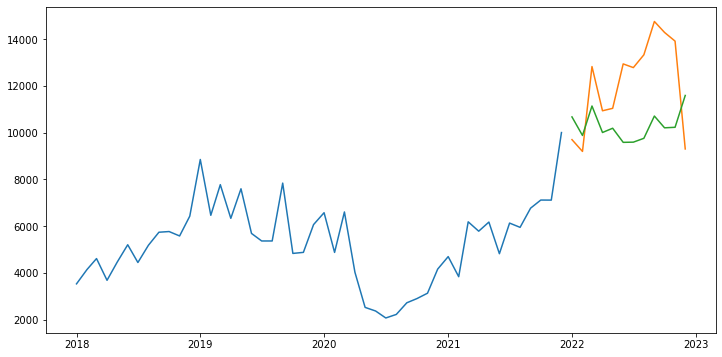

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Split the data into train and test sets (if needed)
train_data = df.iloc[:-12]  # Use all data except the last 12 months for training
test_data = df.iloc[-12:]   # Last 12 months for testing

# Fit SARIMA model
model = SARIMAX(train_data['Transaction Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Generate forecasts for the next 12 months
forecast = model_fit.get_forecast(steps=12)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Calculate evaluation metrics
mse = mean_squared_error(test_data['Transaction Price'], forecast_values)
mae = mean_absolute_error(test_data['Transaction Price'], forecast_values)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Transaction Price'], label='Train Data')
plt.plot(test_data.index, test_data['Transaction Price'], label='Test Data')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(forecast_values.index, confidence_intervals[:, 0], confidence_intervals[:, 1], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


2.Seasonal Decomposition of Time Series with ARIMA (SARIMA-X)

SARIMA-X models combine the seasonal decomposition of time series (such as the one shown in the previous example) with an ARIMA model. The decomposition helps identify and separate the trend, seasonality, and residual components, which can then be modeled using an ARIMA model. SARIMA-X models are useful when the decomposition reveals clear trend and seasonal patterns.

In [244]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Define the train and test data
train_start_date = pd.to_datetime('start_date')  # Replace 'start_date' with your desired train start date
train_end_date = pd.to_datetime('end_date')      # Replace 'end_date' with your desired train end date
test_start_date = pd.to_datetime('start_date')   # Replace 'start_date' with your desired test start date
test_end_date = pd.to_datetime('end_date')       # Replace 'end_date' with your desired test end date

train_data = df.loc[train_start_date:train_end_date]
test_data = df.loc[test_start_date:test_end_date]

# Create the SARIMAX model
model = sm.tsa.SARIMAX(train_data['Transaction Price'], order=(1, 0, 0), seasonal_order=(0, 1, 1, 12))

# Fit the model to the train data
fitted_model = model.fit()

# Perform forecasting on the test data
forecast = fitted_model.get_forecast(steps=len(test_data))

# Get the predicted values
predicted_values = forecast.predicted_mean

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data['Transaction Price'], predicted_values))

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(test_data['Transaction Price'], predicted_values)

# Print the RMSE and MAE
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


ParserError: Unknown string format: start_date

In [245]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Fit the SARIMAX model
model = SARIMAX(train_data['Transaction Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast on the test set
start_idx = len(train_data)
end_idx = len(df) - 1
forecast = model_fit.predict(start=start_idx, end=end_idx)

# Calculate RMSE and MAE
mse = mean_squared_error(test_data['Transaction Price'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Transaction Price'], forecast)

# Print RMSE and MAE
print('RMSE:', rmse)
print('MAE:', mae)


RMSE: 4000.6675573998828
MAE: 3463.701544761678


Root Mean Squared Error (RMSE): 5625.892016559152
Mean Absolute Error (MAE): 4957.050512559315


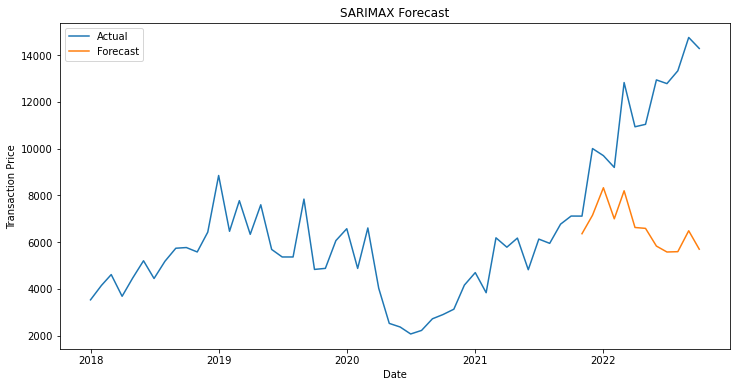

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

# Set the 'datetime_column' as the index
#df.set_index('datetime_column', inplace=True)

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Create and fit the SARIMAX model
model = SARIMAX(train_data['Transaction Price'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate evaluation metrics
mse = mean_squared_error(test_data['Transaction Price'], predictions)
mae = mean_absolute_error(test_data['Transaction Price'], predictions)
rms = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rms}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Transaction Price'], label='Actual')
plt.plot(predictions.index, predictions, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 4861.3164302655705
Root Mean Squared Error (RMSE): 5502.4128255010555


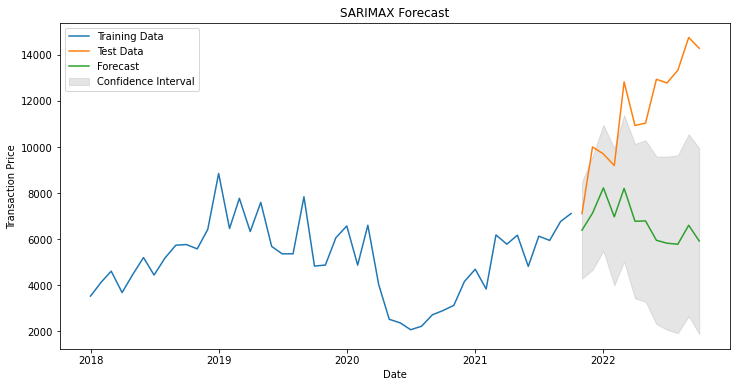

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame with the relevant columns

# Prepare the data
#df['datetime_column'] = pd.to_datetime(df['datetime_column'])
#df.set_index('datetime_column', inplace=True)
df.sort_index(inplace=True)

# Split the data into train and test sets
train_data = df.iloc[:-12]  # Use all data except the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Define and fit the SARIMAX model
order = (1, 0, 1)            # (p, d, q) order for the ARIMA component
seasonal_order = (0, 1, 1, 12)  # (P, D, Q, S) order for the seasonal component
model = SARIMAX(train_data['Transaction Price'], order=order, seasonal_order=seasonal_order)
result = model.fit()

# Generate forecasts for the next 12 months
forecast = result.get_forecast(steps=12)

# Extract the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
ci_lower = forecast.conf_int()['lower Transaction Price']
ci_upper = forecast.conf_int()['upper Transaction Price']

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['Transaction Price'], forecasted_values)
mse = mean_squared_error(test_data['Transaction Price'], forecasted_values)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Transaction Price'], label='Training Data')
plt.plot(test_data.index, test_data['Transaction Price'], label='Test Data')
plt.plot(forecasted_values.index, forecasted_values, label='Forecast')
plt.fill_between(forecasted_values.index, ci_lower, ci_upper, color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [250]:
# Assuming 'df' is your DataFrame with the relevant columns
# Make sure 'datetime_column' is in a datetime format

#df.set_index('datetime_column', inplace=True)


In [251]:
train_data = df[:-12]  # Use all data except the last 12 months for training
test_data = df[-12:]   # Use the last 12 months for testing


In [ ]:
# Set the parameter search space
p_values = range(0, 3)  # p values for AR component
d_values = range(0, 2)  # d values for differencing
q_values = range(0, 3)  # q values for MA component
P_values = range(0, 2)  # P values for seasonal AR component
D_values = range(0, 2)  # D values for seasonal differencing
Q_values = range(0, 2)  # Q values for seasonal MA component
m = 12                  # Seasonal period

best_score = float('inf')
best_order = None
best_seasonal_order = None

# Perform grid search to find the best parameters
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        order = (p, d, q)
                        seasonal_order = (P, D, Q, m)
                        model = SARIMAX(train_data['Transaction Price'], order=order, seasonal_order=seasonal_order)
                        results = model.fit(disp=False)
                        score = results.aic
                        if score < best_score:
                            best_score = score
                            best_order = order
                            best_seasonal_order = seasonal_order

print(f"Best SARIMA Order: {best_order}")
print(f"Best Seasonal SARIMA Order: {best_seasonal_order}")


Root Mean Squared Error (RMSE): 3372.1612350293963
Mean Absolute Error (MAE): 2824.1012870419822


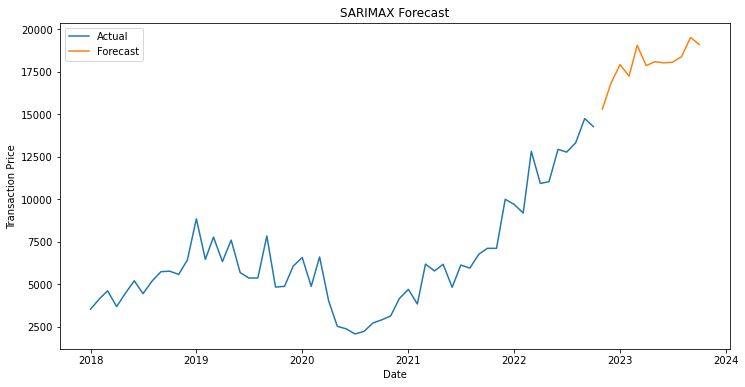

In [342]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns

# Set 'datetime_column' as the index and convert it to a datetime format
#df.set_index('datetime_column', inplace=True)
#df.index = pd.to_datetime(df.index)

# Create the SARIMAX model
order = (1, 1, 2)
seasonal_order = (0, 1, 1, 12)
model = sm.tsa.SARIMAX(df['Transaction Price'], order=order, seasonal_order=seasonal_order)

# Fit the model
model_fit = model.fit()

# Get the predicted values
start_date = df.index[-1] + pd.DateOffset(months=1)
end_date = start_date + pd.DateOffset(months=11)
predicted = model_fit.predict(start=start_date, end=end_date)

# Split the data into train and test sets if needed
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit the model on the training data
model_train = sm.tsa.SARIMAX(train_data['Transaction Price'], order=order, seasonal_order=seasonal_order)
model_train_fit = model_train.fit()

# Get the predicted values for the test data
predicted_test = model_train_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Evaluate the model performance
mse = mean_squared_error(test_data['Transaction Price'], predicted_test)
mae = mean_absolute_error(test_data['Transaction Price'], predicted_test)
rms = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rms)
print('Mean Absolute Error (MAE):', mae)

# Plot the actual data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Transaction Price'], label='Actual')
plt.plot(predicted.index, predicted, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Transaction Price')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


In [351]:
# Create a DataFrame for actual and forecast values
forecast_df = pd.DataFrame({'Actual': Actual, 'Forecast': forecast_values}, index=test_data.index)

# Save the DataFrame to a CSV file
forecast_df.to_csv('forecast.csv')


NameError: name 'Actual' is not defined

In [346]:
os.chdir("C:\\Users\\Shingan\\Downloads")
df=pd.read_csv("forecast.csv")

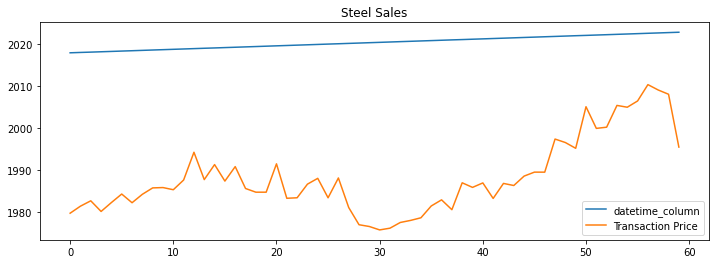

In [187]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Steel Sales')
plt.show(block=False)

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 0, 0))  # Set the order of the ARIMA model
model_fit = model.fit()

# Forecast the next 12 months
forecast_dates = pd.date_range(start=df.index[-1], periods=12, freq='M')
forecast_values = pd.Series(model_fit.forecast(steps=12)[0], index=forecast_dates)


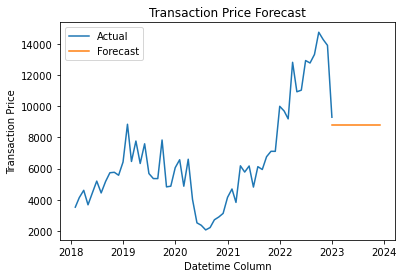

In [139]:
# Plot the actual and forecasted data
plt.plot(df.index, df['Transaction Price'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.xlabel('Datetime Column')
plt.ylabel('Transaction Price')
plt.title('Transaction Price Forecast')
plt.legend()
plt.show()

In [ ]:
from scipy import stats

# Assuming 'data' is your dataset
transformed_data, lambda_value = stats.boxcox(data)

# 'transformed_data' contains the transformed dataset
# 'lambda_value' represents the estimated lambda parameter of the transformation


In [38]:
data=df

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18030 entries, 0 to 18064
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     18030 non-null  int64         
 1   Transaction Price  18030 non-null  float64       
 2   datetime_column    18030 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 563.4 KB


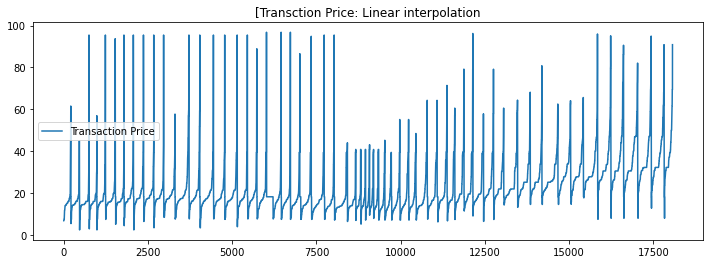

In [40]:
data = data.assign(Transction_Price_Linear_Interpolation=data['Transaction Price'].interpolate(method='linear'))
data[['Transaction Price']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('[Transction Price: Linear interpolation')
plt.show(block=False)


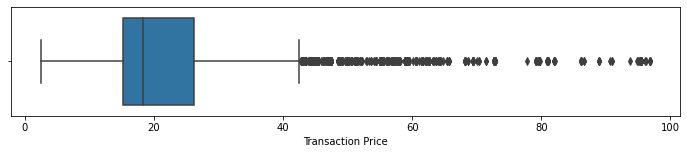

In [41]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Transaction Price'],whis=1.5)

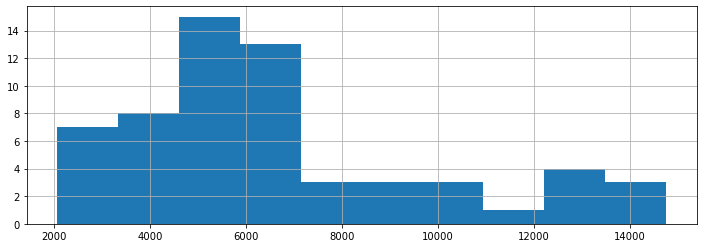

In [261]:
fig = data['Transaction Price'].hist(figsize = (12,4))

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18030 entries, 0 to 18064
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Transaction ID                         18030 non-null  int64         
 1   Transaction Price                      18030 non-null  float64       
 2   datetime_column                        18030 non-null  datetime64[ns]
 3   Transction_Price_Linear_Interpolation  18030 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 704.3 KB


#Build and evaluate time series forecast

Split time series data into training and test set

In [43]:
train_len = 48
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [44]:
train.count()

Transaction ID                           48
Transaction Price                        48
datetime_column                          48
Transction_Price_Linear_Interpolation    48
dtype: int64

Simple time series methods

Naive Method

In [45]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Transaction Price'][train_len-1]

Plot train, test and forecast

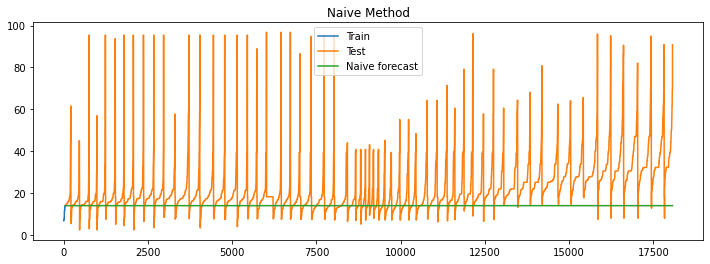

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Transaction Price'], label='Train')
plt.plot(test['Transaction Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [264]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Transaction Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Transaction Price']-y_hat_naive['naive_forecast'])/test['Transaction Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2811.1,18.26


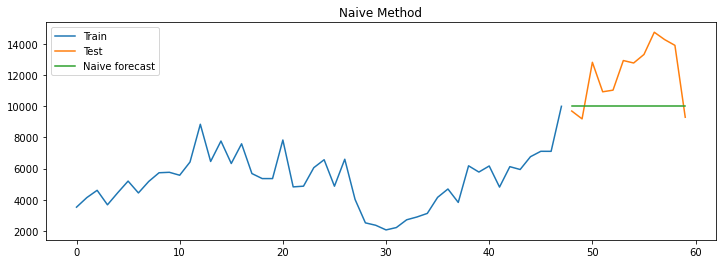

,Method,RMSE,MAPE
0,Naive method,2811.1,18.26


In [266]:
#Split time series data into training and test set

train_len = 48
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

#Simple time series methods

#Naive Method

y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Transaction Price'][train_len-1]

#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Transaction Price'], label='Train')
plt.plot(test['Transaction Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Transaction Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Transaction Price']-y_hat_naive['naive_forecast'])/test['Transaction Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
Simple Average Method

In [267]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Transaction Price'].mean()

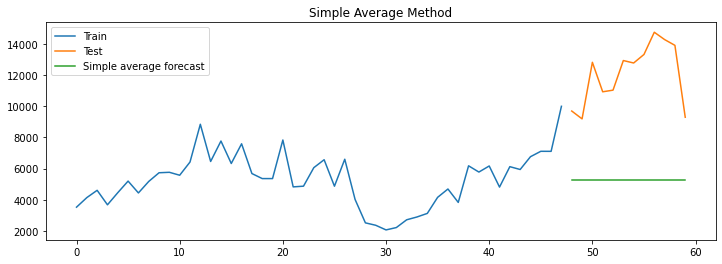

In [268]:
plt.figure(figsize=(12,4))
plt.plot(train['Transaction Price'], label='Train')
plt.plot(test['Transaction Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [269]:
rmse = np.sqrt(mean_squared_error(test['Transaction Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Transaction Price']-y_hat_avg['avg_forecast'])/test['Transaction Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2811.1,18.26
0,Simple average method,7039.8,54.96


TypeError: float() argument must be a string or a number, not 'Timestamp'

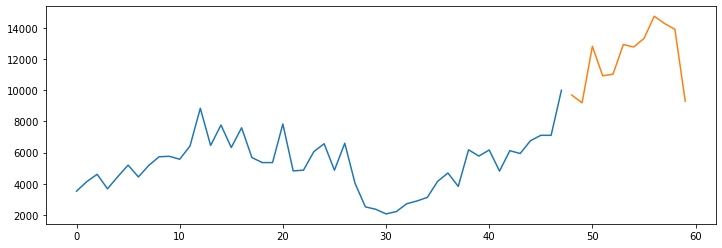

In [277]:
# Split time series data into training and test set
train_len = 48
train = data[0:train_len]  # first 18000 data points as the training set
test = data[train_len:]  # remaining data points as the test set

# Simple time series methods

# Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Transaction Price'].iloc[-1]  # Use the last value from the training set as the forecast

# Extend the test set for the next year
extended_test = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
extended_test = pd.DataFrame(extended_test, columns=['Date'])
extended_test.set_index('Date', inplace=True)
extended_test['Transaction Price'] = np.nan

# Concatenate the extended test set with the forecast
extended_test = pd.concat([y_hat_naive, extended_test])

# Plot train, test, and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Transaction Price'], label='Train')
plt.plot(test['Transaction Price'], label='Test')
plt.plot(extended_test['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error

# Remove missing values from the extended test set for calculating the metrics
extended_test_cleaned = extended_test.dropna(subset=['Transaction Price'])

rmse = np.sqrt(mean_squared_error(test['Transaction Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Transaction Price'] - y_hat_naive['naive_forecast']) / test['Transaction Price']) * 100, 2)

# Update the results DataFrame with the extended forecast period
results = pd.DataFrame({'Method': ['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]

# Print the results
print(results)


TypeError: float() argument must be a string or a number, not 'Timestamp'

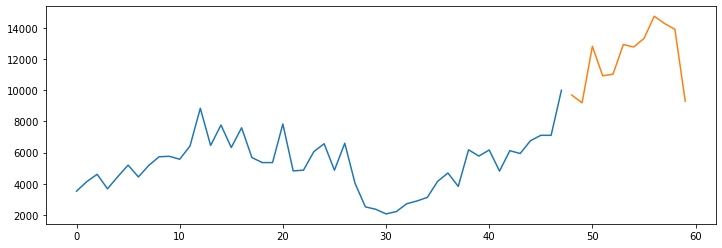

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Split time series data into training and test set
train_len = 48
train = data[:train_len]
test = data[train_len:]

# Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Transaction Price'].iloc[-1]

# Extend the test set for the next year
extended_test = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
extended_test = pd.DataFrame(extended_test, columns=['Date'])
extended_test['naive_forecast'] = y_hat_naive['naive_forecast'].iloc[-1]

# Concatenate the extended test set with the forecast
y_hat_naive = pd.concat([y_hat_naive, extended_test.set_index('Date')])

# Plot train, test, and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Transaction Price'], label='Train')
plt.plot(test['Transaction Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Transaction Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Transaction Price'] - y_hat_naive['naive_forecast']) / test['Transaction Price']) * 100, 2)

# Create results DataFrame
results = pd.DataFrame({'Method': ['Naive Method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]
print(results)


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Split time series data into training and test set
train_len = 48
train = data[:train_len]
test = data[train_len:]

# Naive Method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Transaction Price'].iloc[-1]


In [119]:
# Extend the test set for the next year
extended_test = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
extended_test = pd.DataFrame(extended_test, columns=['Date'])
extended_test['naive_forecast'] = y_hat_naive['naive_forecast'].iloc[-1]

# Concatenate the extended test set with the forecast
y_hat_naive = pd.concat([y_hat_naive, extended_test.set_index('Date')])


TypeError: float() argument must be a string or a number, not 'Timestamp'

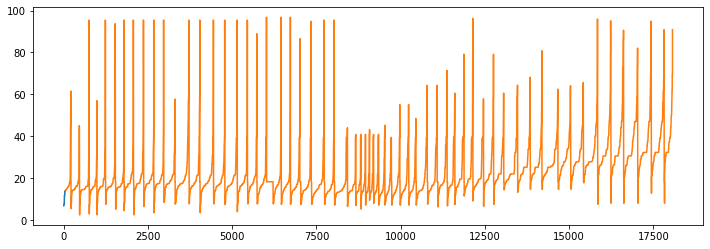

In [120]:
# Plot train, test, and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Transaction Price'], label='Train')
plt.plot(test['Transaction Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [121]:
Box Cox transformation to make variance constant

SyntaxError: invalid syntax (<ipython-input-121-a4f85b451ff8>, line 1)

In [122]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Transction Price'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

KeyError: 'Transction Price'

In [123]:
Differencing to remove trend

SyntaxError: invalid syntax (<ipython-input-123-cb2872ab2427>, line 1)

In [124]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

NameError: name 'data_boxcox' is not defined

In [125]:
data_boxcox_diff.dropna(inplace=True)

NameError: name 'data_boxcox_diff' is not defined

In [126]:
data_boxcox_diff.tail()

NameError: name 'data_boxcox_diff' is not defined

In [127]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

NameError: name 'data_boxcox' is not defined

In [128]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

NameError: name 'train_data_boxcox_diff' is not defined

In [129]:
Recover Original Time series``

SyntaxError: invalid syntax (<ipython-input-129-1cdba2ac2faf>, line 1)

In [130]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

NameError: name 'data_boxcox_diff' is not defined

In [131]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

NameError: name 'train_data_boxcox' is not defined

In [132]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

NameError: name 'data_boxcox_diff' is not defined

In [133]:
plt.figure(figsize=(12,4))
plt.plot(train['Transction Price'], label='Train')
plt.plot(test['Transction Price'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

KeyError: 'Transction Price'

<Figure size 864x288 with 0 Axes>